<a href="https://colab.research.google.com/github/shumshersubashgautam/KU-Research-Gait_Analysis/blob/main/gaitanalysis_Largedata_2970_sample_RF_test_acc_96_4646_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 from google.colab import drive 
 drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
!cp /content/gdrive/MyDrive/gait-final-joint-angles-dataset.csv /content/gaitphase/

In [193]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline


import os
for dirname, _, filenames in os.walk('/content/gaitphase/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/gaitphase/gait-final-joint-angles-dataset.csv


In [194]:
import warnings
warnings.filterwarnings('ignore')

In [258]:
data = '/content/2970.csv'

df = pd.read_csv(data)

In [259]:
df.shape

(2969, 4)

In [260]:
df.head()

,hip-angle,knee-angle,ankle-angle,phase
0,19.033295,2.793752,66.436670,1
1,20.733910,3.179830,67.298731,1
2,21.417248,3.179830,67.298731,1
3,22.349802,3.881837,68.013458,1
4,23.864921,5.276593,67.878058,1


In [261]:
df.columns

Index(['hip-angle', 'knee-angle', 'ankle-angle', 'phase'], dtype='object')

In [262]:
X = df.drop(['phase'], axis=1)

y = df['phase']

In [263]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [264]:
X_train.shape, X_test.shape

((2375, 3), (594, 3))

In [265]:
cols = X_train.columns

In [266]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [267]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [268]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [269]:
X_train.describe()

,hip-angle,knee-angle,ankle-angle
count,2.375000e+03,2.375000e+03,2.375000e+03
mean,2.887047e-16,2.916965e-17,-3.979039e-16
std,1.000211e+00,1.000211e+00,1.000211e+00
min,-1.516804e+00,-1.093108e+00,-6.868330e+00
25%,-9.544322e-01,-7.975618e-01,-8.762075e-01
50%,1.465254e-01,-4.396229e-01,1.132222e-01
75%,8.302572e-01,5.251137e-01,7.693317e-01
max,2.211776e+00,3.404636e+00,2.863123e+00


In [270]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc=SVC() 
svc.fit(X_train,y_train)

y_pred=svc.predict(X_test)

print('Model accuracy : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy : 0.9646


In [271]:
svc=SVC(C=100.0) 
svc.fit(X_train,y_train)

y_pred=svc.predict(X_test)

print('C=100.0 Model accuracy with rbf kernel : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

C=100.0 Model accuracy with rbf kernel : 0.9663


In [272]:
linear_svc=SVC(kernel='linear', C=1.0) 
linear_svc.fit(X_train,y_train)

y_pred_test=linear_svc.predict(X_test)

print('C=1.0 Model accuracy with linear kernel : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

C=1.0 Model accuracy with linear kernel : 0.9478


In [273]:
linear_svc=SVC(kernel='linear', C=10.0) 
linear_svc.fit(X_train,y_train)

y_pred_test=linear_svc.predict(X_test)

print('C=10.0 Model accuracy with linear kernel : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

C=10.0 Model accuracy with linear kernel : 0.9461


In [274]:
linear_svc=SVC(kernel='linear', C=100.0) 
linear_svc.fit(X_train,y_train)

y_pred_test=linear_svc.predict(X_test)

print('C=100.0 Model accuracy with linear kernel : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

C=100.0 Model accuracy with linear kernel : 0.9461


In [275]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 87  22]
 [ 10 475]]

True Positives(TP) =  87

True Negatives(TN) =  475

False Positives(FP) =  22

False Negatives(FN) =  10


<Axes: >

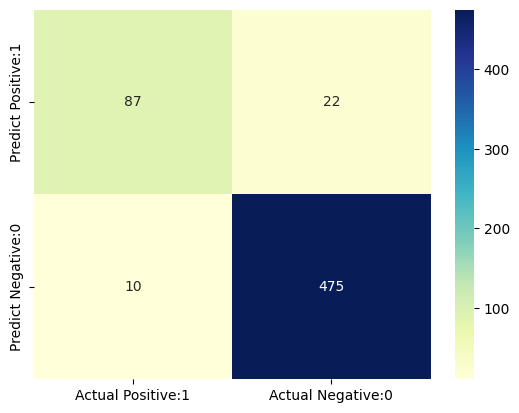

In [276]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [277]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.90      0.80      0.84       109
           1       0.96      0.98      0.97       485

    accuracy                           0.95       594
   macro avg       0.93      0.89      0.91       594
weighted avg       0.94      0.95      0.94       594



In [278]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


kfold=KFold(n_splits=5, shuffle=True, random_state=0)


linear_svc=SVC(kernel='linear')


linear_scores = cross_val_score(linear_svc, X, y, cv=kfold)

In [279]:
print('Cross-validation with linear kernel:\n\n{}'.format(linear_scores))

Cross-validation with linear kernel:

[0.94612795 0.95791246 0.93939394 0.95791246 0.95784148]


In [280]:
print('Average cross-validation with linear kernel:{:.4f}'.format(linear_scores.mean()))

Average cross-validation with linear kernel:0.9518


In [281]:
rbf_svc=SVC(kernel='rbf')

rbf_scores = cross_val_score(rbf_svc, X, y, cv=kfold)

In [282]:
print('Cross-validation with rbf kernel:\n\n{}'.format(rbf_scores))

Cross-validation with rbf kernel:

[0.95959596 0.97138047 0.95622896 0.96632997 0.96795953]


In [283]:
print('Average cross-validation with rbf kernel:{:.4f}'.format(rbf_scores.mean()))

Average cross-validation with rbf kernel:0.9643


In [284]:
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC

svc=SVC() 


parameters = [ {'C':[1, 10, 50], 'kernel':['linear']},
               {'C':[1, 10, 50], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.5, 0.9]}
              ]




grid_search = GridSearchCV(estimator = svc,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 50], 'kernel': ['linear']},
                         {'C': [1, 10, 50], 'gamma': [0.1, 0.2, 0.5, 0.9],
                          'kernel': ['rbf']}],
             scoring='accuracy')

In [285]:
print('GridSearch CV best: {:.4f}\n\n'.format(grid_search.best_score_))


print('Best results :','\n\n', (grid_search.best_params_))

GridSearch CV best: 0.9739


Best results : 

 {'C': 10, 'gamma': 0.9, 'kernel': 'rbf'}


In [286]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import os
for dirname, _, filenames in os.walk('/content/gaitphase'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/content/gaitphase/gait-final-joint-angles-dataset.csv


In [288]:
df = pd.read_csv('/content/2970.csv')

In [289]:
import numpy as np
import pandas as pd
import seaborn as sns
import keras
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt

from scipy import stats
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE, ADASYN

from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, accuracy_score, recall_score, classification_report, f1_score, average_precision_score, precision_recall_fscore_support, roc_auc_score)
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier 
import xgboost as XGB
import lightgbm as lgb

import warnings
warnings.filterwarnings("ignore")

In [69]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 9.1 MB/s eta 0:00:00


In [290]:
df.head()

,hip-angle,knee-angle,ankle-angle,phase
0,19.033295,2.793752,66.436670,1
1,20.733910,3.179830,67.298731,1
2,21.417248,3.179830,67.298731,1
3,22.349802,3.881837,68.013458,1
4,23.864921,5.276593,67.878058,1


In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2969 entries, 0 to 2968
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hip-angle    2969 non-null   float64
 1   knee-angle   2969 non-null   float64
 2   ankle-angle  2969 non-null   float64
 3   phase        2969 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 92.9 KB


In [292]:
df.describe()

,hip-angle,knee-angle,ankle-angle,phase
count,2969.000000,2969.000000,2969.000000,2969.000000
mean,13.061326,16.027548,70.232525,0.815426
std,8.738816,14.436522,10.056961,0.388017
min,0.000000,0.000000,0.666200,0.000000
25%,4.776740,4.430619,61.939709,1.000000
50%,13.499480,9.751061,71.347611,1.000000
75%,20.359222,23.704273,78.003101,1.000000
max,32.589680,65.637871,99.020526,1.000000


In [293]:
df.isnull().sum().sort_values(ascending=False)

hip-angle      0
knee-angle     0
ankle-angle    0
phase          0
dtype: int64

In [294]:
df['hip-angle'].value_counts()

17.130393    9
8.133623     9
0.573427     6
0.788864     6
18.417221    5
            ..
4.305951     1
2.094852     1
2.260502     1
1.424994     1
1.188619     1
Name: hip-angle, Length: 2656, dtype: int64

Text(0.5, 1.0, 'phase')

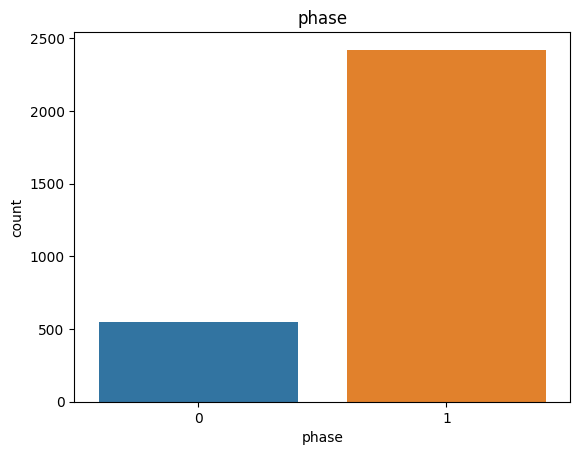

In [295]:
sns.countplot(x = df['phase'])
plt.title('phase')

array([[<Axes: title={'center': 'hip-angle'}>,
        <Axes: title={'center': 'knee-angle'}>],
       [<Axes: title={'center': 'ankle-angle'}>,
        <Axes: title={'center': 'phase'}>]], dtype=object)

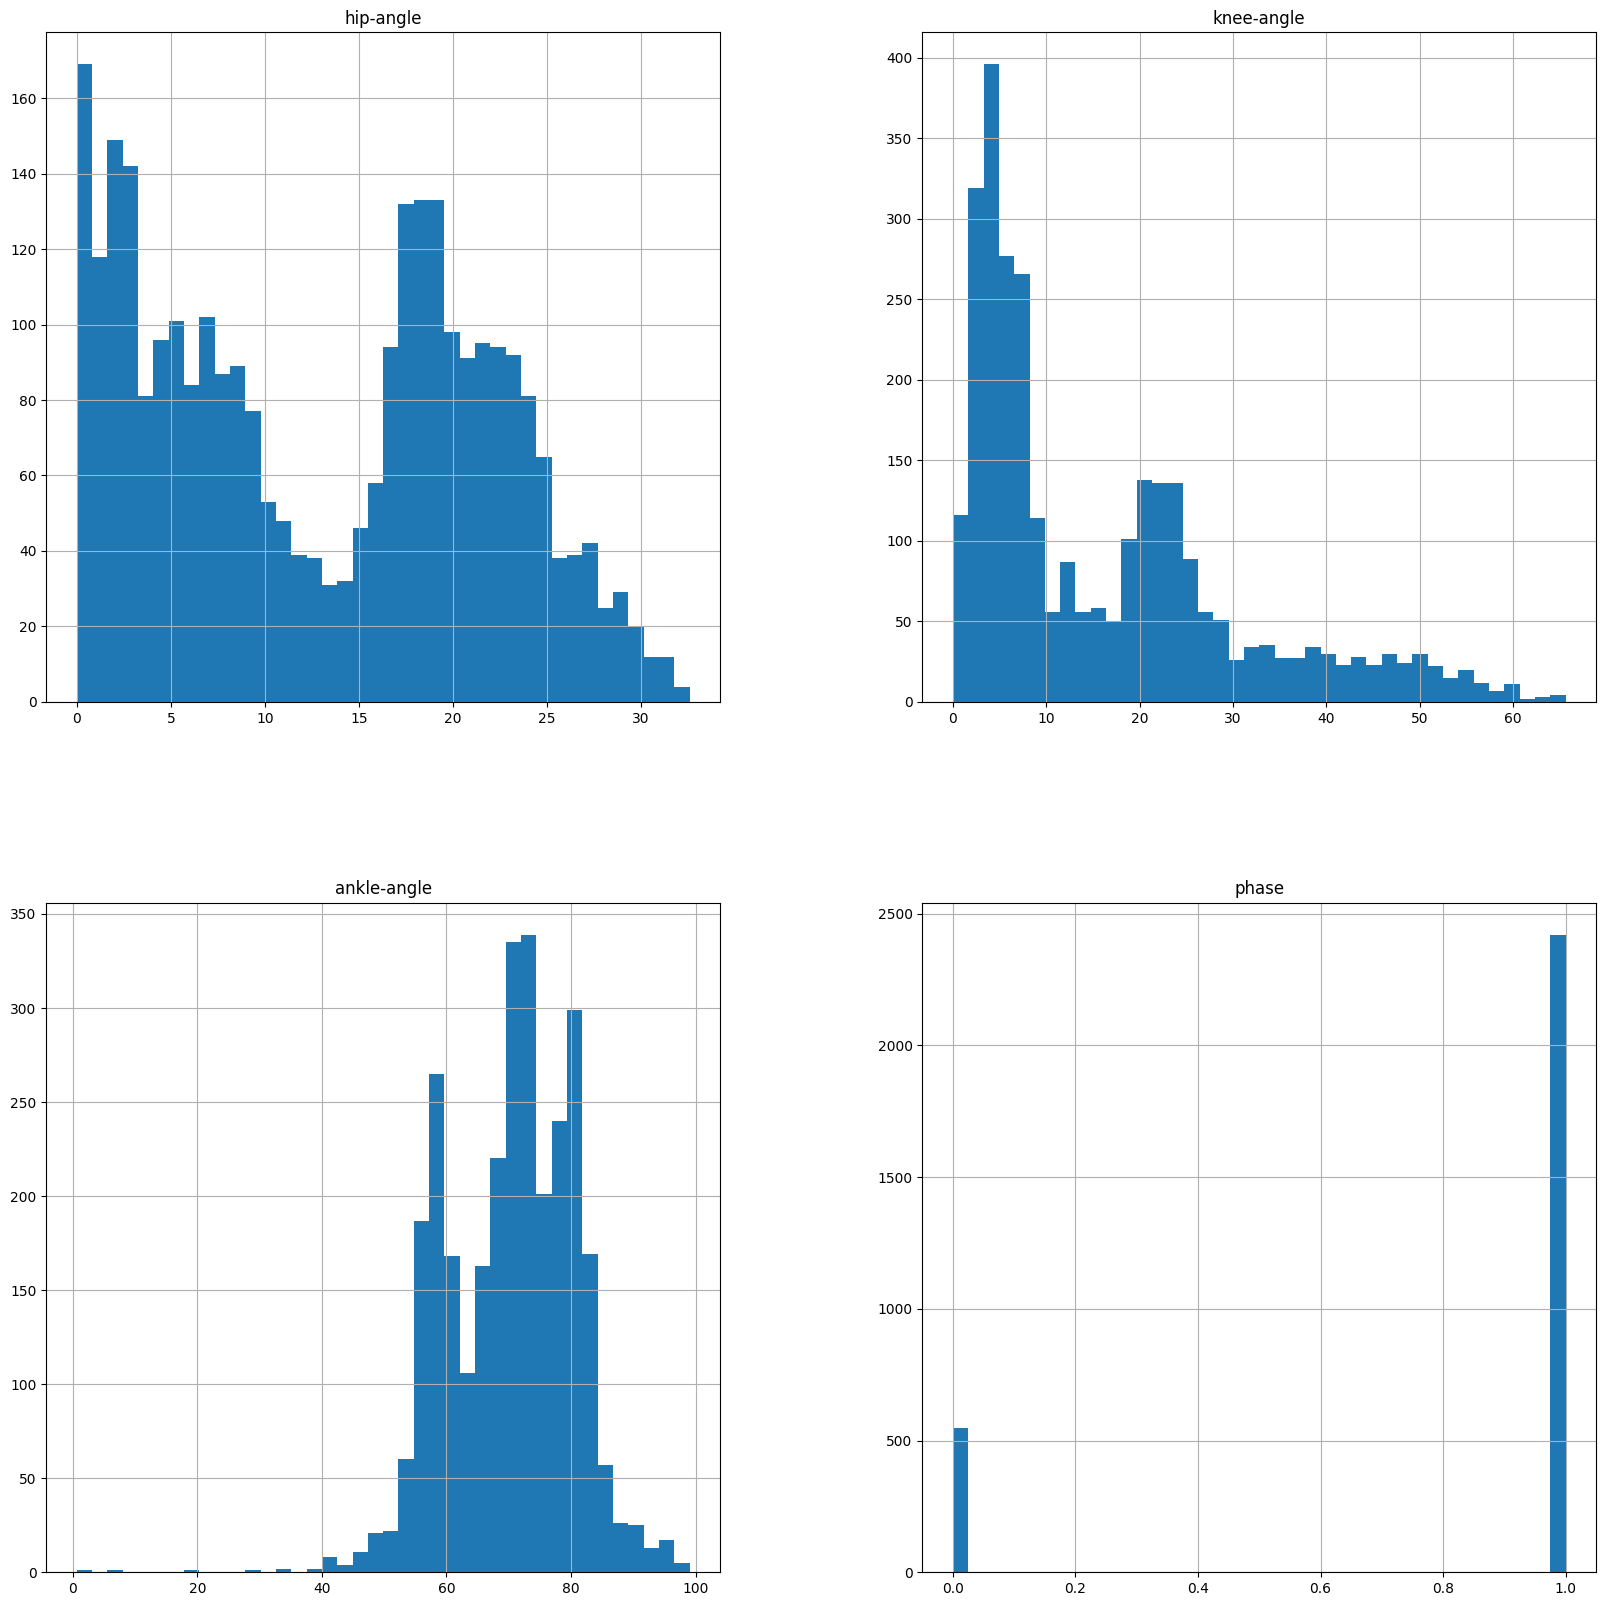

In [296]:
df.hist(bins = 40, figsize = (20,20))

<Axes: >

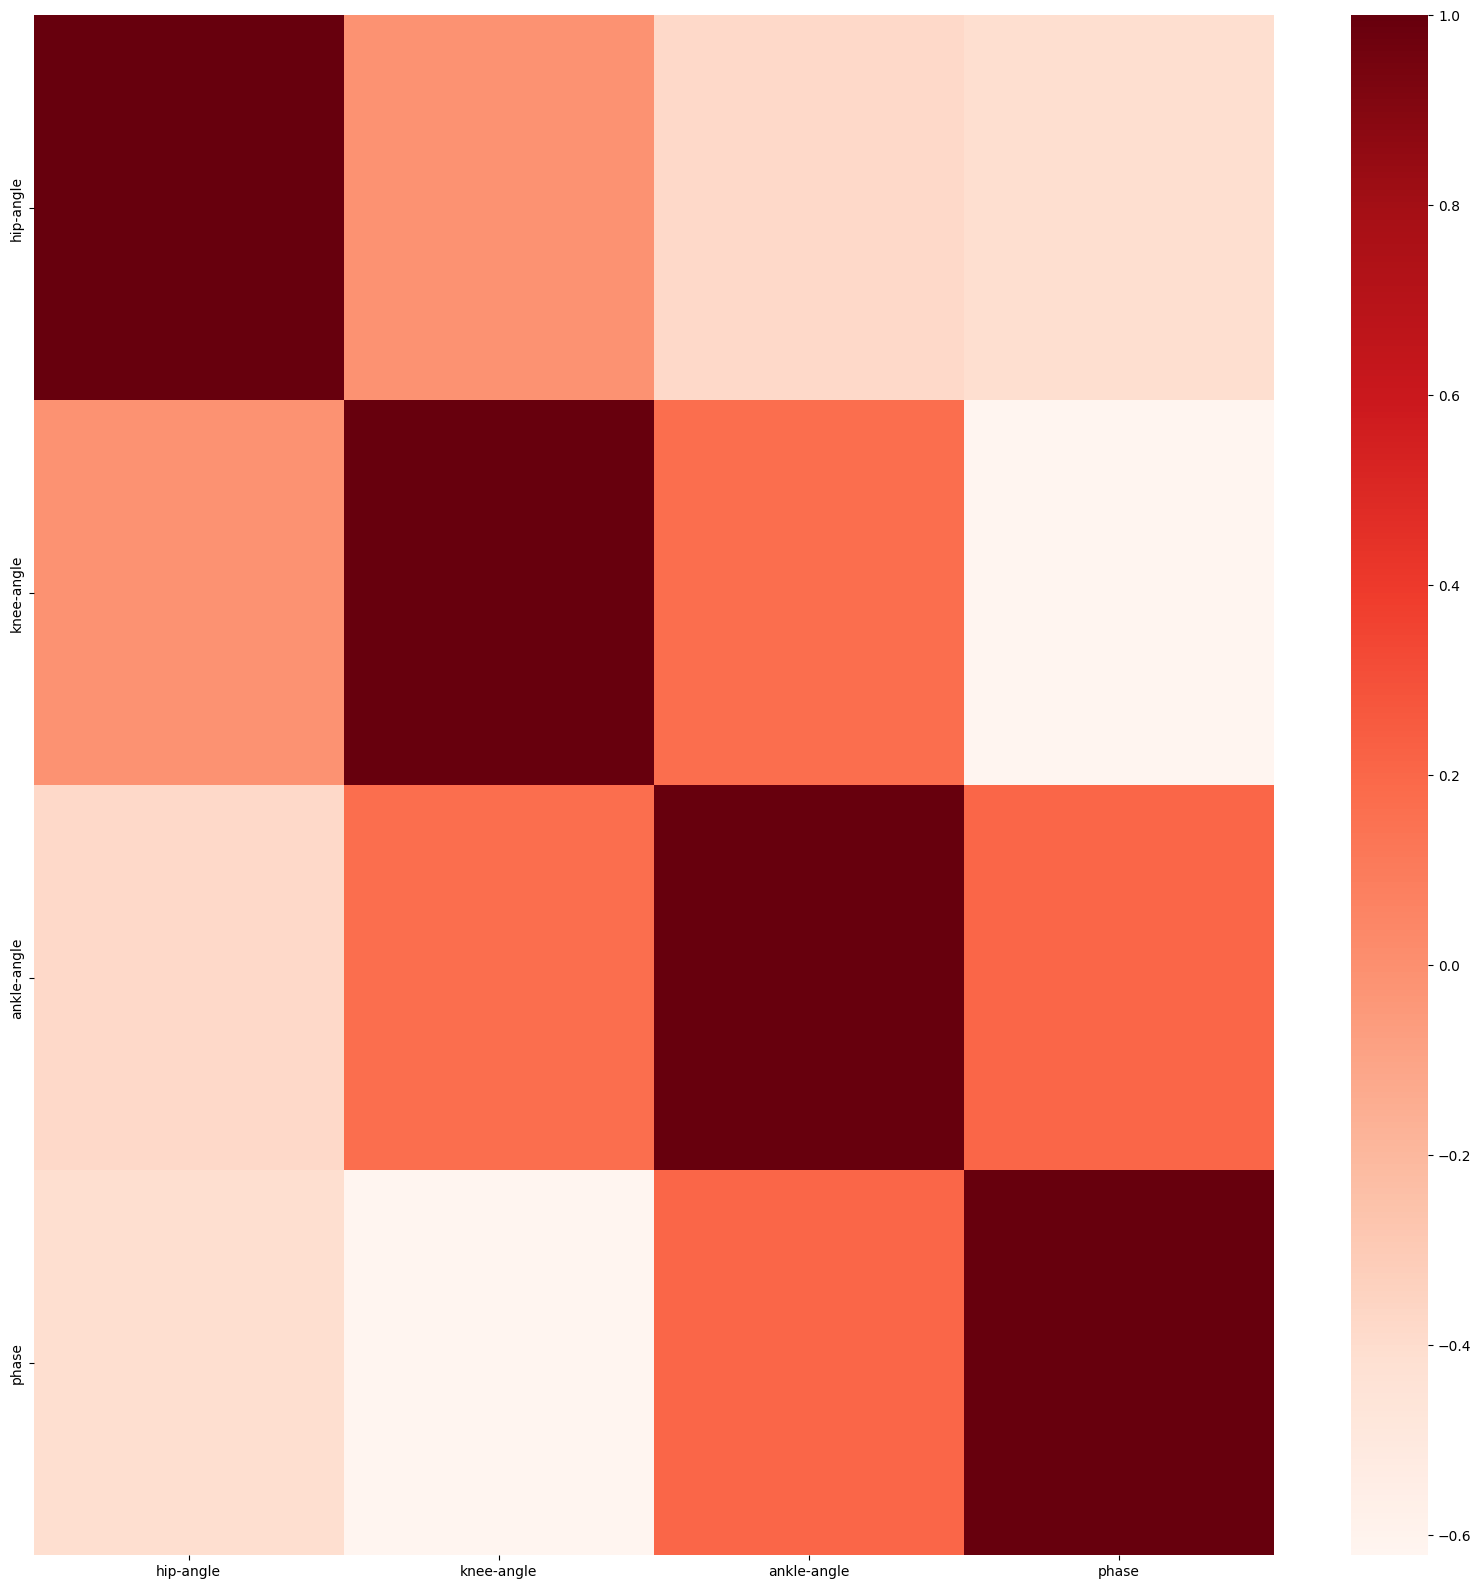

In [297]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), cmap = 'Reds')

In [298]:
def preprocess(df):
    X = df.drop(['phase'], axis=1)

    y = df['phase']

    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state=2)
    
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)
    
    return X_train, X_test, y_train, y_test

In [299]:
X_train, X_test, y_train, y_test = preprocess(df)

In [300]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2375, 3), (594, 3), (2375,), (594,))

In [301]:
y_test.value_counts() / len(y_test)

1    0.806397
0    0.193603
Name: phase, dtype: float64

In [302]:
var_models = {
    "Logistic Regression": LogisticRegression(solver = "liblinear", l1_ratio = 0.4),
    "K-Nearest Neighbors": KNeighborsClassifier(weights='distance', metric='euclidean'),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (LinearSVC)": LinearSVC(C = 0.3),
    "Support Vector Machine (kernel SVM)": SVC(kernel = 'rbf', random_state = 0),
    "MLPClassifier": MLPClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(loss = "exponential"),
    "AdaBoost Classifier": AdaBoostClassifier(n_estimators = 60, learning_rate = 0.2),
    "XgBoost Classifier": XGB.XGBClassifier(),
    "CatBoost Classifier": CatBoostClassifier(),
    "LightGBM": LGBMClassifier()
}

for name, model in var_models.items():
  model.fit(X_train, y_train)
  print(name + ' was completed.')

Logistic Regression was completed.
K-Nearest Neighbors was completed.
Decision Tree was completed.
Support Vector Machine (LinearSVC) was completed.
Support Vector Machine (kernel SVM) was completed.
MLPClassifier was completed.
Random Forest was completed.
Gradient Boosting was completed.
AdaBoost Classifier was completed.
XgBoost Classifier was completed.
Learning rate set to 0.014905
0:	learn: 0.6638067	total: 2.48ms	remaining: 2.48s
1:	learn: 0.6395798	total: 5.45ms	remaining: 2.72s
2:	learn: 0.6158088	total: 8.14ms	remaining: 2.71s
3:	learn: 0.5900157	total: 10.5ms	remaining: 2.61s
4:	learn: 0.5710675	total: 12.2ms	remaining: 2.42s
5:	learn: 0.5488198	total: 13.8ms	remaining: 2.28s
6:	learn: 0.5266368	total: 15.8ms	remaining: 2.24s
7:	learn: 0.5075910	total: 17.8ms	remaining: 2.2s
8:	learn: 0.4877437	total: 19.7ms	remaining: 2.17s
9:	learn: 0.4721048	total: 22ms	remaining: 2.18s
10:	learn: 0.4572591	total: 23.9ms	remaining: 2.15s
11:	learn: 0.4398072	total: 25.8ms	remaining: 2.13s

In [303]:
var_results = []

for name, model in var_models.items():
  results = model.score(X_test, y_test)
  var_results.append(results)

  print('----------     '+name+'     ----------')

  model = var_models[name]
  y_test_pred = model.predict(X_test)
  print(metrics.classification_report(y_test_pred, y_test))
  print(name + ': {:.4f}%'.format(results * 100))
  print('Accuracy :{0:0.4f}'.format(metrics.accuracy_score(y_test_pred , y_test))) 
  print('AUC : {0:0.4f}'.format(metrics.roc_auc_score(y_test_pred , y_test)))
  print('Precision : {0:0.4f}'.format(metrics.precision_score(y_test_pred , y_test)))
  print('Recall : {0:0.4f}'.format(metrics.recall_score(y_test_pred , y_test)))
  print('F1 : {0:0.4f}'.format(metrics.f1_score(y_test_pred , y_test)))

----------     Logistic Regression     ----------
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       101
           1       0.98      0.96      0.97       493

    accuracy                           0.95       594
   macro avg       0.90      0.94      0.92       594
weighted avg       0.95      0.95      0.95       594

Logistic Regression: 94.9495%
Accuracy :0.9495
AUC : 0.9381
Precision : 0.9833
Recall : 0.9554
F1 : 0.9691
----------     K-Nearest Neighbors     ----------
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       113
           1       0.98      0.98      0.98       481

    accuracy                           0.97       594
   macro avg       0.95      0.95      0.95       594
weighted avg       0.97      0.97      0.97       594

K-Nearest Neighbors: 96.9697%
Accuracy :0.9697
AUC : 0.9542
Precision : 0.9833
Recall : 0.9792
F1 : 0.9812
----------     Decision Tree    

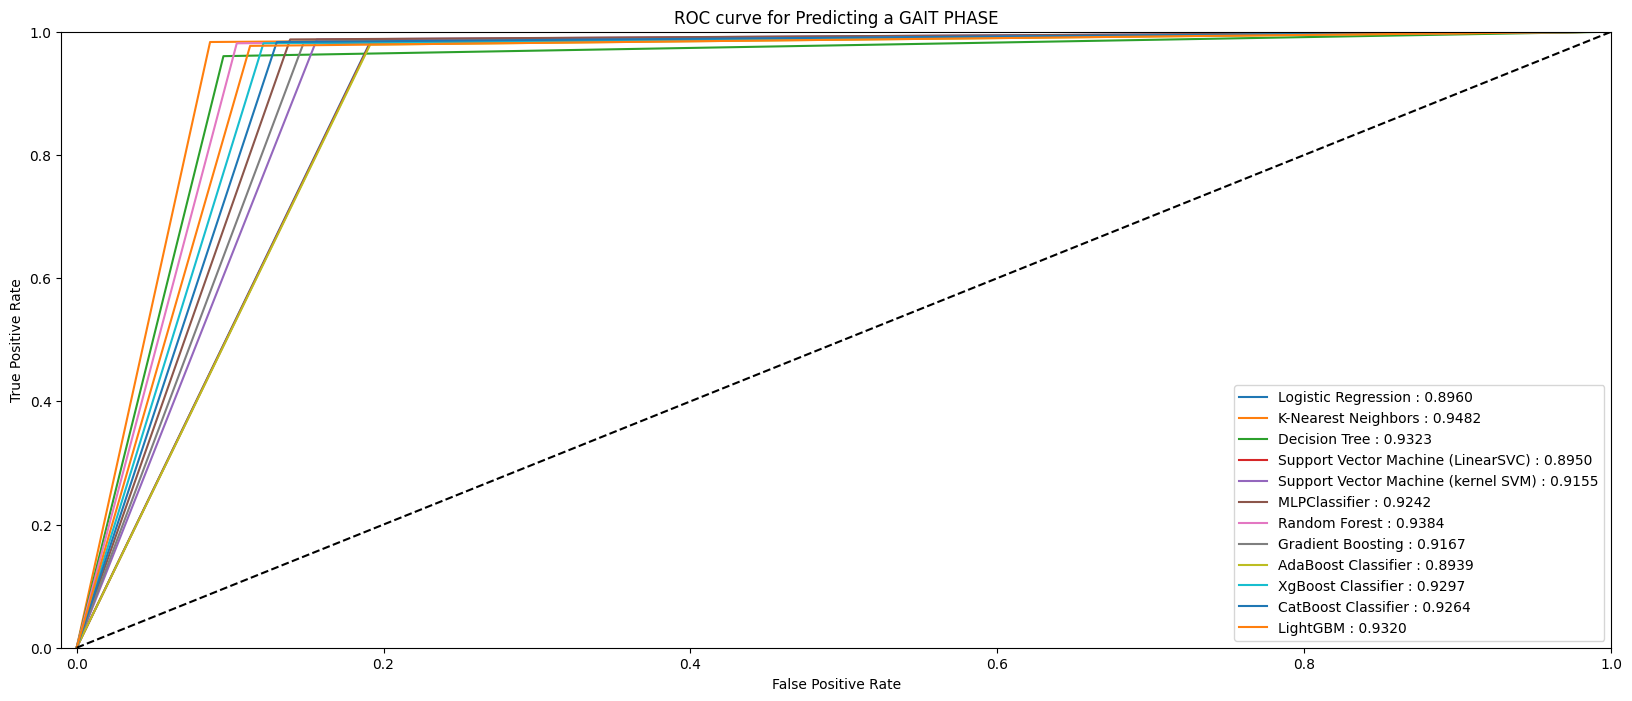

In [304]:
fig, ax = plt.subplots()
fig.set_size_inches(20,8)

for i in var_models:
    y_pred = var_models[i].predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
    roc_auc = auc(fpr, tpr)
    precision, recall, th = precision_recall_curve(y_test, y_pred,pos_label=1)
    plt.plot(fpr, tpr, label= i + ' : {:.4f}'.format(roc_auc_score(y_test, y_pred)))

plt.plot([0,1], [0,1], 'k--' )
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Predicting a GAIT PHASE')
plt.legend(loc=4)
plt.show()


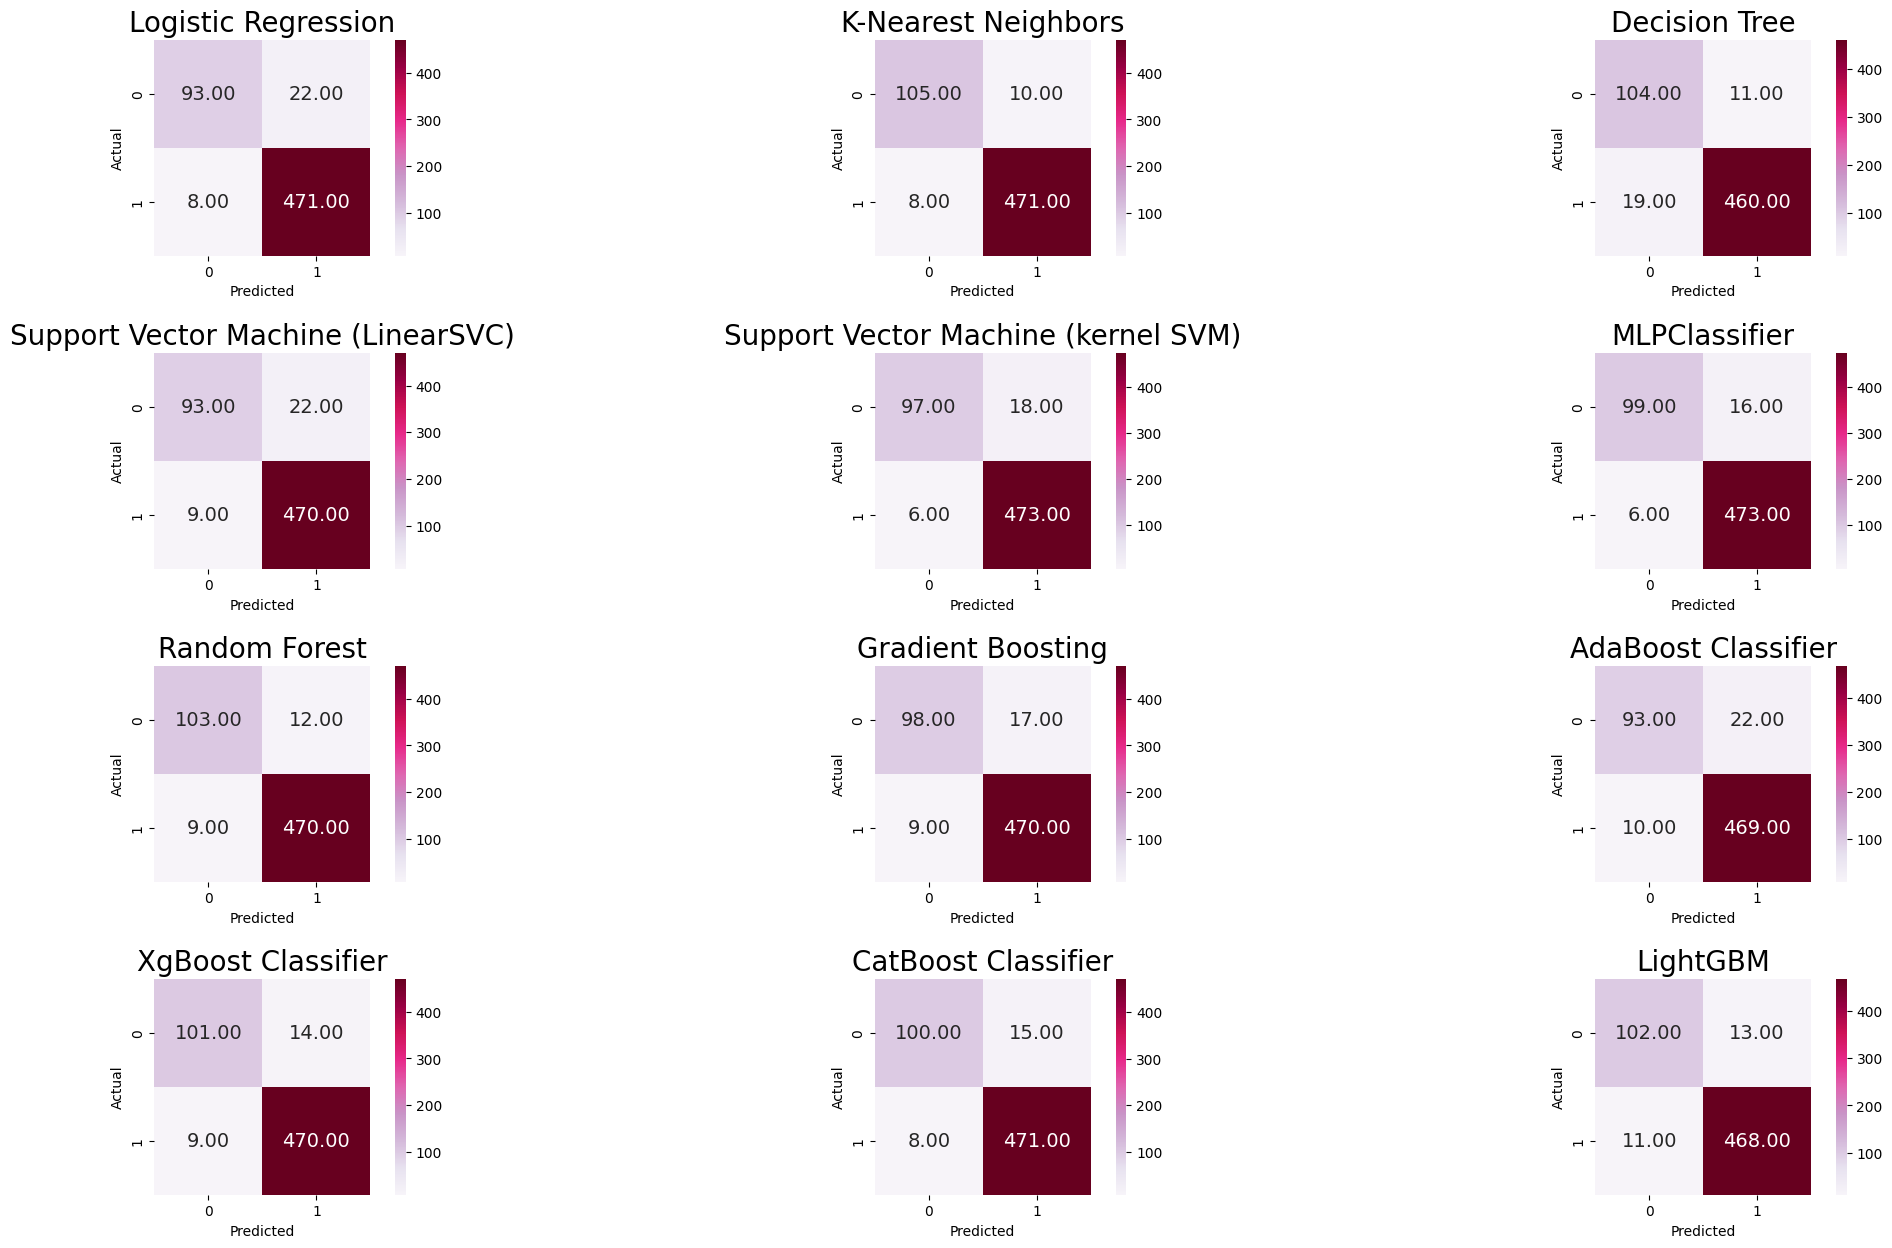

In [305]:
a = 1

fig = plt.figure(figsize=(25,15))

for name, model in var_models.items():
    results = model.score(X_test, y_test)
    model = var_models[name]
    y_test_pred = model.predict(X_test)
    arg_test = {'y_true':y_test, 'y_pred':y_test_pred}

    conf_mx = confusion_matrix(y_test, y_test_pred)

    heat_cm = pd.DataFrame(conf_mx, columns=np.unique(y_test), index = np.unique(y_test))
    heat_cm.index.name = 'Actual'
    heat_cm.columns.name = 'Predicted'

    plt.subplot(4, 3, a)
    fig.subplots_adjust(wspace=0.45, hspace= 0.45)
    sns.heatmap(heat_cm, annot=True, fmt='.2f', square=True, annot_kws={"size": 14}, cmap = 'PuRd').set_title(name, fontsize = 20)
    a = a + 1

plt.show()

In [306]:
def preprocess(df):
    X = df.drop(['phase'], axis=1)

    y = df['phase']

    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state=2)
      
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)
  
    return X_train, X_test, y_train, y_test

In [307]:
X_train, X_test, y_train, y_test = preprocess(df)

In [308]:
sm = SMOTE(random_state = 42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

Text(0.5, 1.0, 'phase')

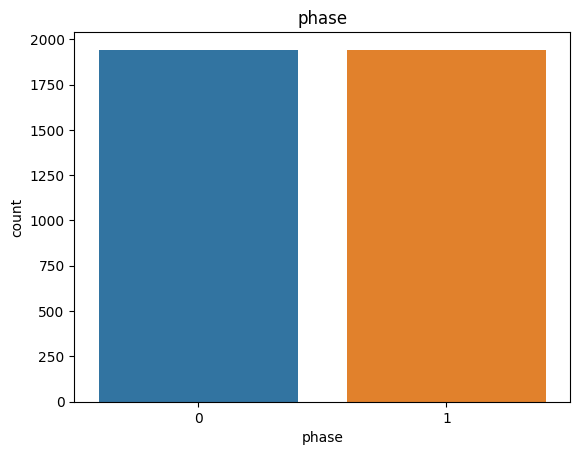

In [309]:
sns.countplot(x = y_train_smote)
plt.title('phase')

In [310]:
var_models_smote = {
    "Logistic Regression": LogisticRegression(solver = "liblinear", l1_ratio = 0.4),
    "K-Nearest Neighbors": KNeighborsClassifier(weights='distance', metric='euclidean'),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (LinearSVC)": LinearSVC(C = 0.3),
    "Support Vector Machine (SVC)": SVC(),
    "MLPClassifier": MLPClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(loss = "exponential"),
    "AdaBoost Classifier": AdaBoostClassifier(n_estimators = 60, learning_rate = 0.2),
    "XgBoost Classifier": XGB.XGBClassifier(),
    "CatBoost Classifier": CatBoostClassifier(),
    "LightGBM": LGBMClassifier()
}

for name, model in var_models_smote.items():
  model.fit(X_train_smote, y_train_smote)
  print(name + ' was completed.')

Logistic Regression was completed.
K-Nearest Neighbors was completed.
Decision Tree was completed.
Support Vector Machine (LinearSVC) was completed.
Support Vector Machine (SVC) was completed.
MLPClassifier was completed.
Random Forest was completed.
Gradient Boosting was completed.
AdaBoost Classifier was completed.
XgBoost Classifier was completed.
Learning rate set to 0.018389
0:	learn: 0.6597095	total: 2.28ms	remaining: 2.28s
1:	learn: 0.6296581	total: 4.47ms	remaining: 2.23s
2:	learn: 0.5996285	total: 6.6ms	remaining: 2.19s
3:	learn: 0.5729507	total: 8.94ms	remaining: 2.23s
4:	learn: 0.5496071	total: 11.3ms	remaining: 2.24s
5:	learn: 0.5270566	total: 13.7ms	remaining: 2.27s
6:	learn: 0.5072242	total: 16ms	remaining: 2.27s
7:	learn: 0.4892169	total: 18.3ms	remaining: 2.27s
8:	learn: 0.4700596	total: 20.6ms	remaining: 2.27s
9:	learn: 0.4516792	total: 22.8ms	remaining: 2.26s
10:	learn: 0.4343915	total: 25.9ms	remaining: 2.33s
11:	learn: 0.4173346	total: 30.8ms	remaining: 2.53s
12:	le

In [311]:
var_results_smote = []

for name, model in var_models_smote.items():
  results_smote = model.score(X_test, y_test)
  var_results_smote.append(results_smote)

  print('----------     '+name+'     ----------')

  model = var_models_smote[name]
  y_test_pred_smote = model.predict(X_test)
  print(metrics.classification_report(y_test , y_test_pred_smote))
  print('Accuracy : {:0.4f}'.format(metrics.accuracy_score(y_test , y_test_pred_smote))) 
  print('AUC : {0:0.4f}'.format(metrics.roc_auc_score(y_test , y_test_pred_smote)))
  print('Precision : {0:0.4f}'.format(metrics.precision_score(y_test , y_test_pred_smote)))
  print('Recall : {0:0.4f}'.format(metrics.recall_score(y_test , y_test_pred_smote)))
  print('F1 : {0:0.4f}'.format(metrics.f1_score(y_test , y_test_pred_smote)))

----------     Logistic Regression     ----------
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       115
           1       0.97      0.94      0.96       479

    accuracy                           0.93       594
   macro avg       0.88      0.92      0.90       594
weighted avg       0.94      0.93      0.94       594

Accuracy : 0.9343
AUC : 0.9196
Precision : 0.9741
Recall : 0.9436
F1 : 0.9586
----------     K-Nearest Neighbors     ----------
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       115
           1       0.99      0.97      0.98       479

    accuracy                           0.97       594
   macro avg       0.94      0.96      0.95       594
weighted avg       0.97      0.97      0.97       594

Accuracy : 0.9680
AUC : 0.9603
Precision : 0.9873
Recall : 0.9729
F1 : 0.9800
----------     Decision Tree     ----------
              precision    recall  f1-score   

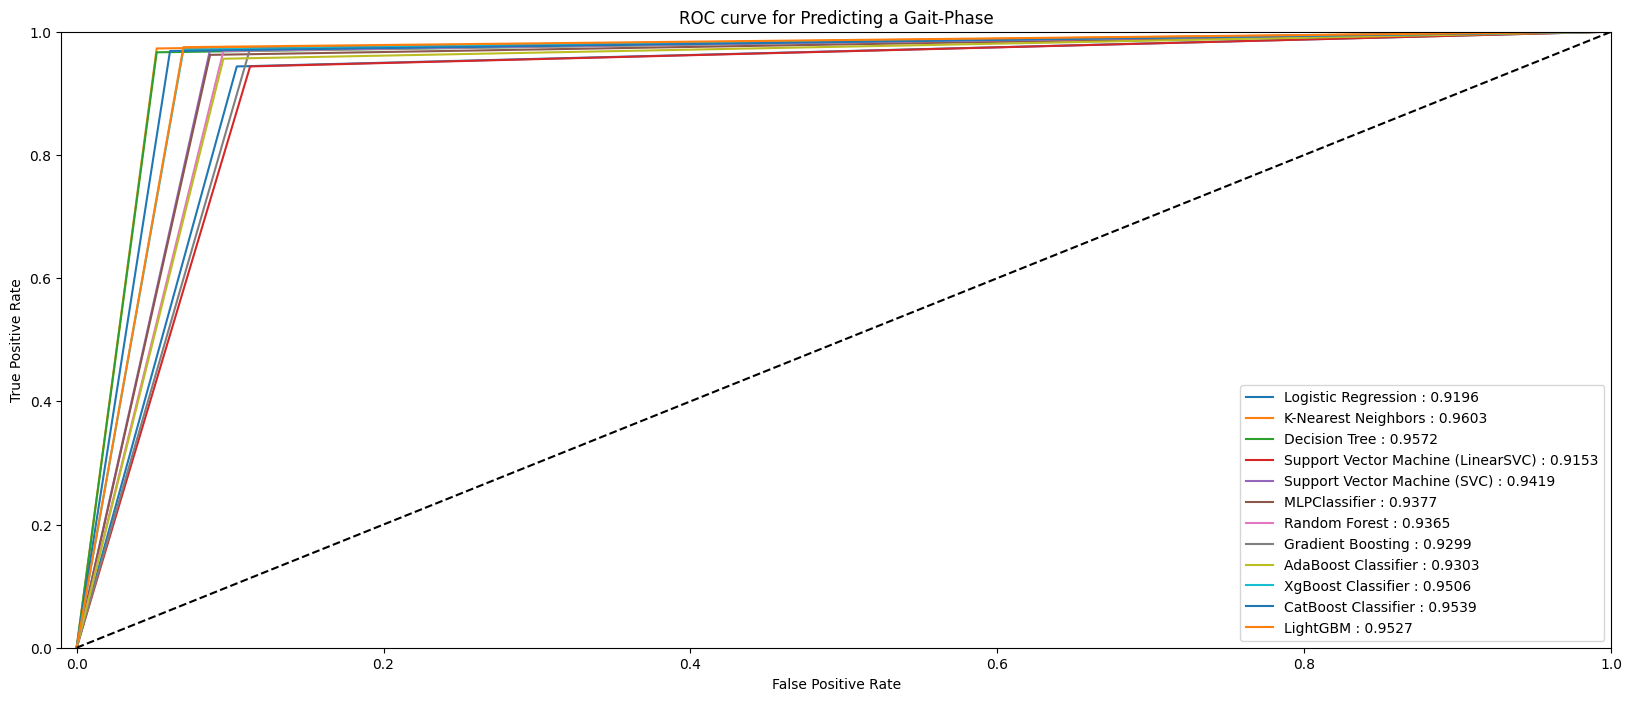

In [312]:
fig, ax = plt.subplots()
fig.set_size_inches(20,8)

for i in var_models_smote:
    y_pred = var_models_smote[i].predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
    roc_auc = auc(fpr, tpr)
    precision, recall, th = precision_recall_curve(y_test, y_pred,pos_label=1)
    plt.plot(fpr, tpr, label= i + ' : {:.4f}'.format(roc_auc_score(y_test, y_pred)))

plt.plot([0,1], [0,1], 'k--' )
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Predicting a Gait-Phase')
plt.legend(loc=4)
plt.show()

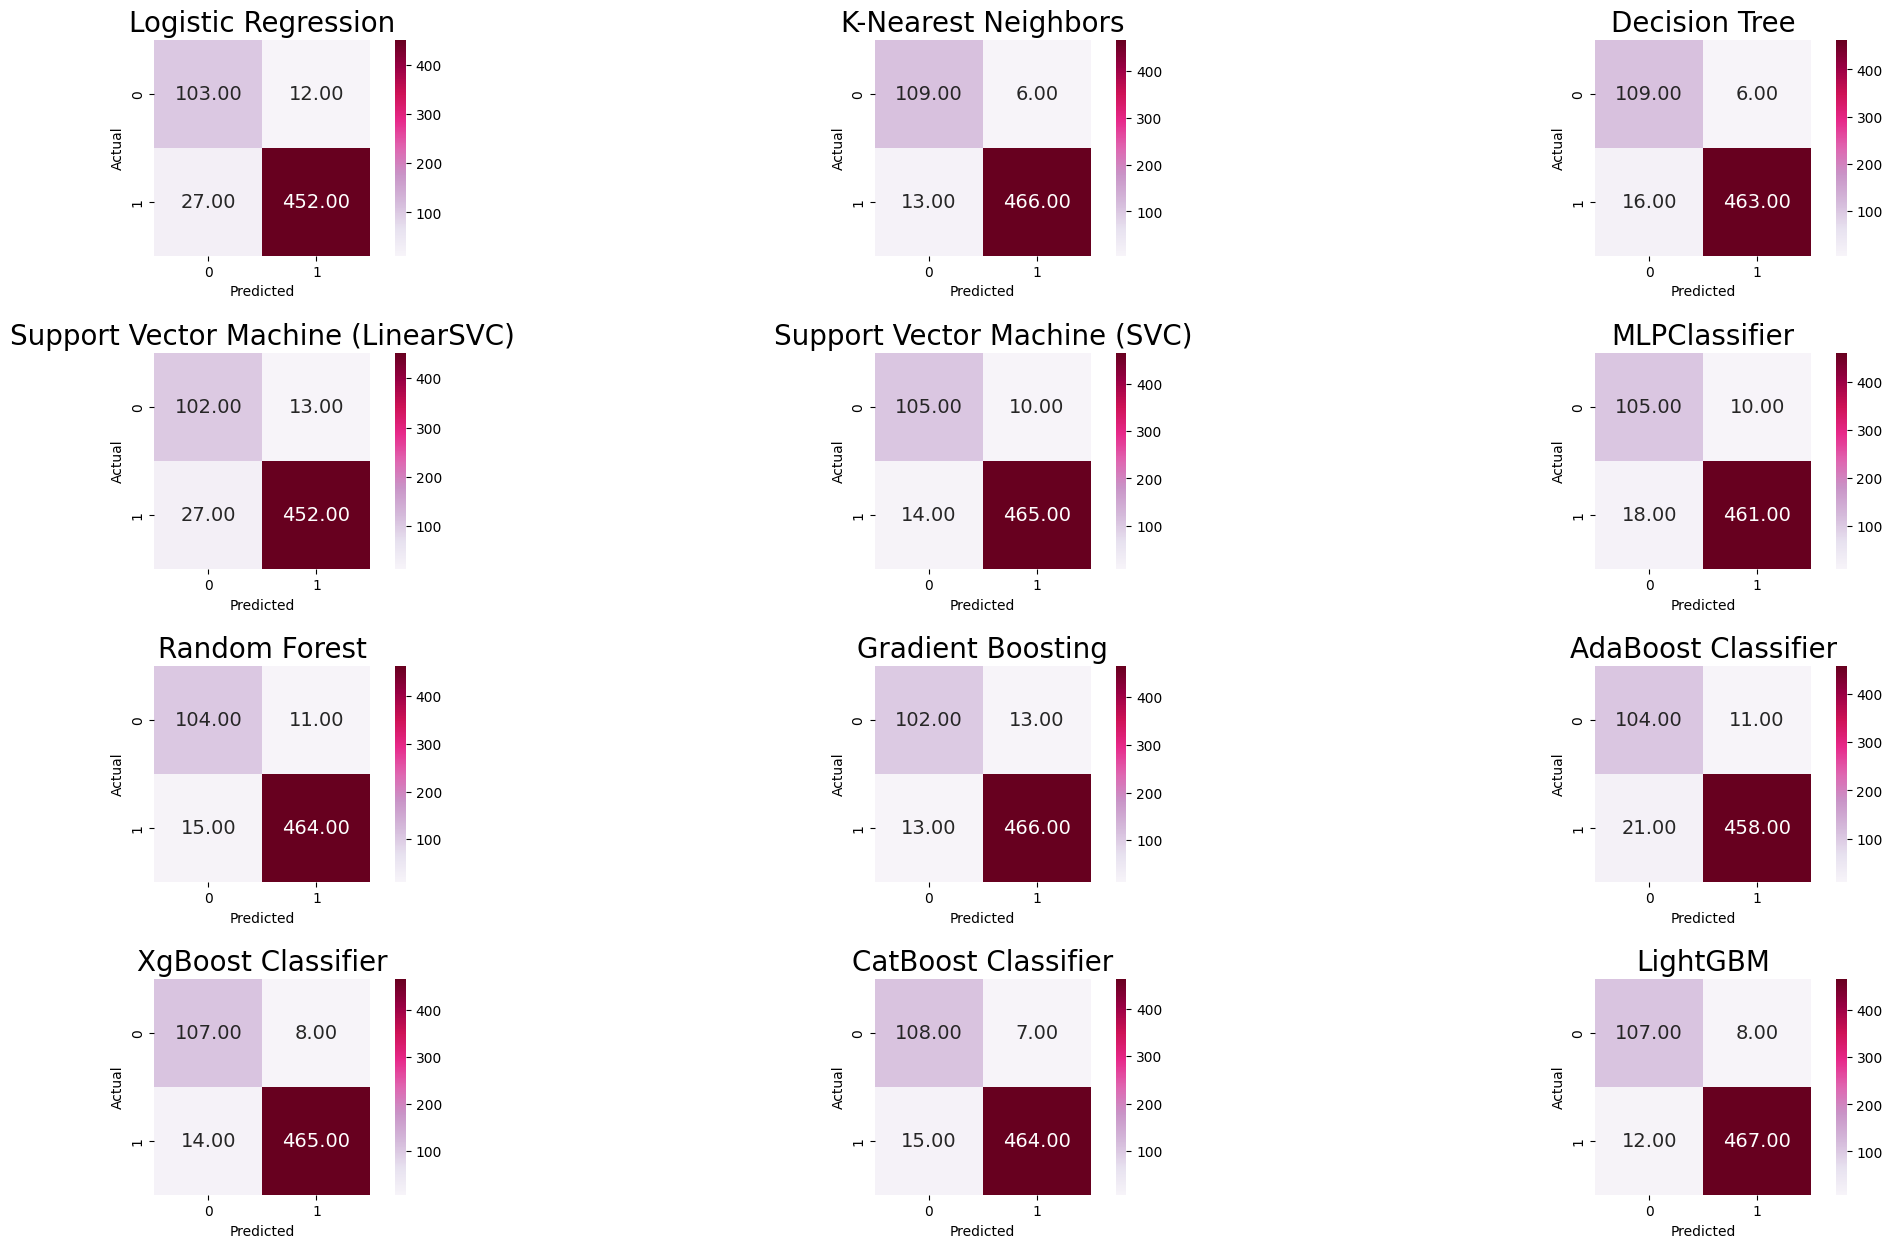

In [313]:
a = 1

fig = plt.figure(figsize=(25,15))

for name, model in var_models_smote.items():
    results = model.score(X_test, y_test)
    model = var_models_smote[name]
    y_test_pred = model.predict(X_test)
    arg_test = {'y_true':y_test, 'y_pred':y_test_pred}

    conf_mx = confusion_matrix(y_test, y_test_pred)

    heat_cm = pd.DataFrame(conf_mx, columns=np.unique(y_test), index = np.unique(y_test))
    heat_cm.index.name = 'Actual'
    heat_cm.columns.name = 'Predicted'

    plt.subplot(4, 3, a)
    fig.subplots_adjust(wspace=0.45, hspace= 0.45)
    sns.heatmap(heat_cm, annot=True, fmt='.2f', square=True, annot_kws={"size": 14}, cmap = 'PuRd').set_title(name, fontsize = 20)
    a = a + 1


In [314]:
def preprocess(df):
    X = df.drop(['phase'], axis=1)

    y = df['phase']


    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state=2)
      
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)
  
    return X_train, X_test, y_train, y_test

In [315]:
X_train, X_test, y_train, y_test = preprocess(df)

In [316]:
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

Text(0.5, 1.0, 'phase')

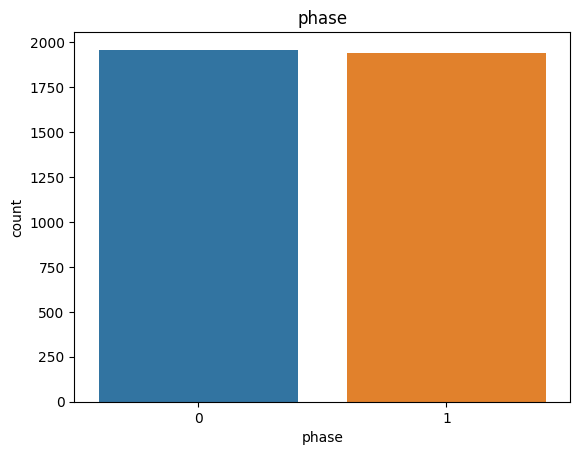

In [317]:
sns.countplot(x = y_train_adasyn)
plt.title('phase')

In [318]:
var_models_adasyn = {
    "Logistic Regression": LogisticRegression(solver = "liblinear", l1_ratio = 0.4),
    "K-Nearest Neighbors": KNeighborsClassifier(weights='distance', metric='euclidean'),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (LinearSVC)": LinearSVC(C = 0.3),
    "Support Vector Machine (SVC)": SVC(),
    "MLPClassifier": MLPClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(loss = "exponential"),
    "AdaBoost Classifier": AdaBoostClassifier(n_estimators = 60, learning_rate = 0.2),
    "XgBoost Classifier": XGB.XGBClassifier(),
    "CatBoost Classifier": CatBoostClassifier(),
    "LightGBM": LGBMClassifier()
}

for name, model in var_models_adasyn.items():
  model.fit(X_train_adasyn, y_train_adasyn)
  print(name + ' was completed.')

Logistic Regression was completed.
K-Nearest Neighbors was completed.
Decision Tree was completed.
Support Vector Machine (LinearSVC) was completed.
Support Vector Machine (SVC) was completed.
MLPClassifier was completed.
Random Forest was completed.
Gradient Boosting was completed.
AdaBoost Classifier was completed.
XgBoost Classifier was completed.
Learning rate set to 0.018421
0:	learn: 0.6676829	total: 2.28ms	remaining: 2.28s
1:	learn: 0.6479046	total: 4.7ms	remaining: 2.35s
2:	learn: 0.6266084	total: 7.05ms	remaining: 2.34s
3:	learn: 0.6097535	total: 9.66ms	remaining: 2.41s
4:	learn: 0.5915590	total: 12ms	remaining: 2.39s
5:	learn: 0.5771520	total: 14.3ms	remaining: 2.37s
6:	learn: 0.5614313	total: 16.6ms	remaining: 2.35s
7:	learn: 0.5466222	total: 18.9ms	remaining: 2.34s
8:	learn: 0.5324102	total: 21.2ms	remaining: 2.34s
9:	learn: 0.5190446	total: 23.5ms	remaining: 2.33s
10:	learn: 0.5073539	total: 25.8ms	remaining: 2.32s
11:	learn: 0.4940487	total: 28.1ms	remaining: 2.32s
12:	le

In [319]:
var_results_adasyn = []

for name, model in var_models_adasyn.items():
  results_adasyn = model.score(X_test, y_test)
  var_results_adasyn.append(results_adasyn)

  print('----------     '+name+'     ----------')

  model = var_models_adasyn[name]
  y_test_pred_adasyn = model.predict(X_test)
  print(metrics.classification_report(y_test , y_test_pred_adasyn))
  print('Accuracy : {:0.4f}'.format(metrics.accuracy_score(y_test , y_test_pred_adasyn))) 
  print('AUC : {0:0.4f}'.format(metrics.roc_auc_score(y_test , y_test_pred_adasyn)))
  print('Precision : {0:0.4f}'.format(metrics.precision_score(y_test , y_test_pred_adasyn)))
  print('Recall : {0:0.4f}'.format(metrics.recall_score(y_test , y_test_pred_adasyn)))
  print('F1 : {0:0.4f}'.format(metrics.f1_score(y_test , y_test_pred_adasyn)))

----------     Logistic Regression     ----------
              precision    recall  f1-score   support

           0       0.57      0.96      0.71       115
           1       0.99      0.83      0.90       479

    accuracy                           0.85       594
   macro avg       0.78      0.89      0.81       594
weighted avg       0.91      0.85      0.86       594

Accuracy : 0.8519
AUC : 0.8916
Precision : 0.9875
Recall : 0.8267
F1 : 0.9000
----------     K-Nearest Neighbors     ----------
              precision    recall  f1-score   support

           0       0.77      0.97      0.86       115
           1       0.99      0.93      0.96       479

    accuracy                           0.94       594
   macro avg       0.88      0.95      0.91       594
weighted avg       0.95      0.94      0.94       594

Accuracy : 0.9377
AUC : 0.9515
Precision : 0.9933
Recall : 0.9290
F1 : 0.9601
----------     Decision Tree     ----------
              precision    recall  f1-score   

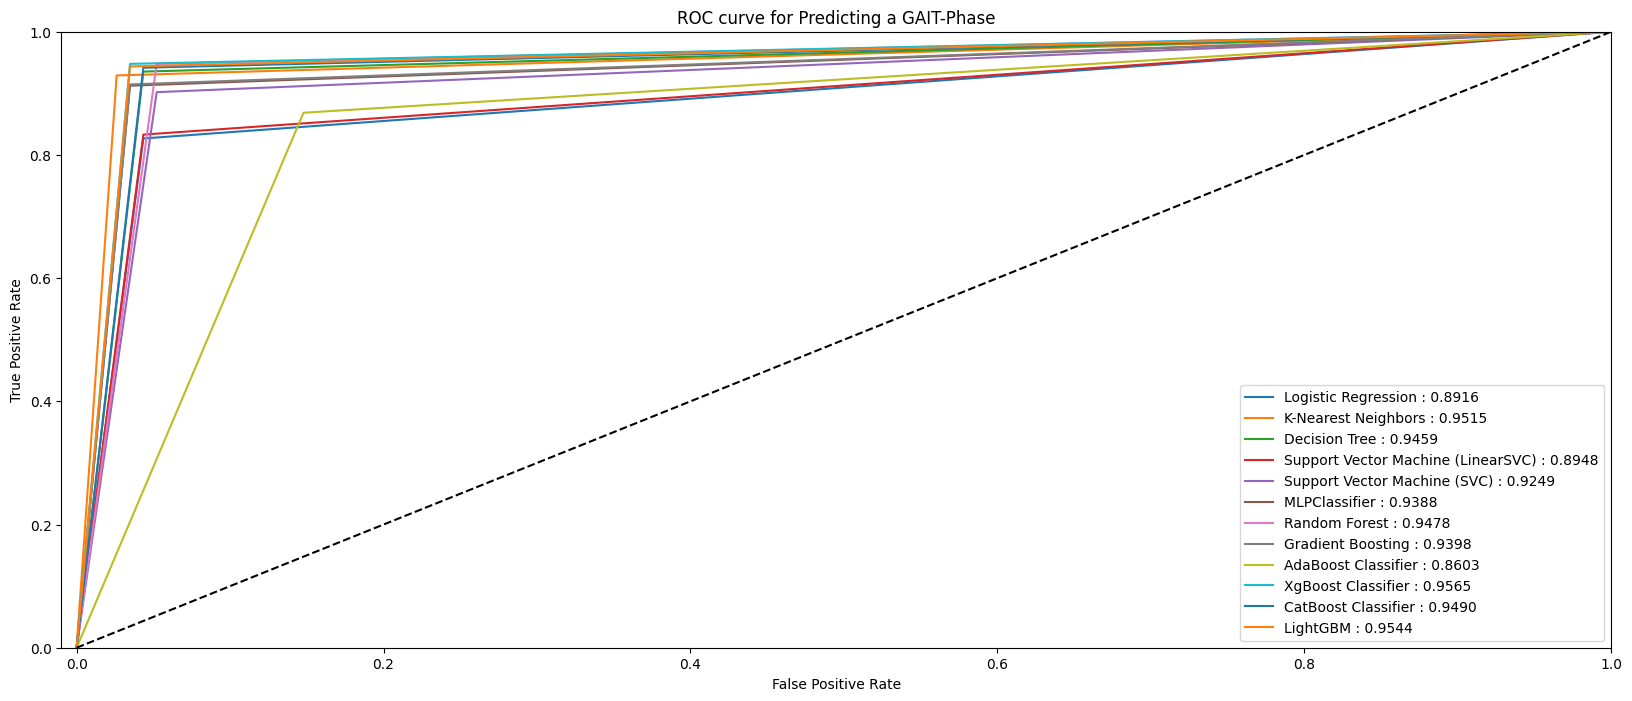

In [320]:
fig, ax = plt.subplots()
fig.set_size_inches(20,8)

for i in var_models_adasyn:
    y_pred = var_models_adasyn[i].predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
    roc_auc = auc(fpr, tpr)
    precision, recall, th = precision_recall_curve(y_test, y_pred,pos_label=1)
    plt.plot(fpr, tpr, label= i + ' : {:.4f}'.format(roc_auc_score(y_test, y_pred)))

plt.plot([0,1], [0,1], 'k--' )
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Predicting a GAIT-Phase')
plt.legend(loc=4)
plt.show()

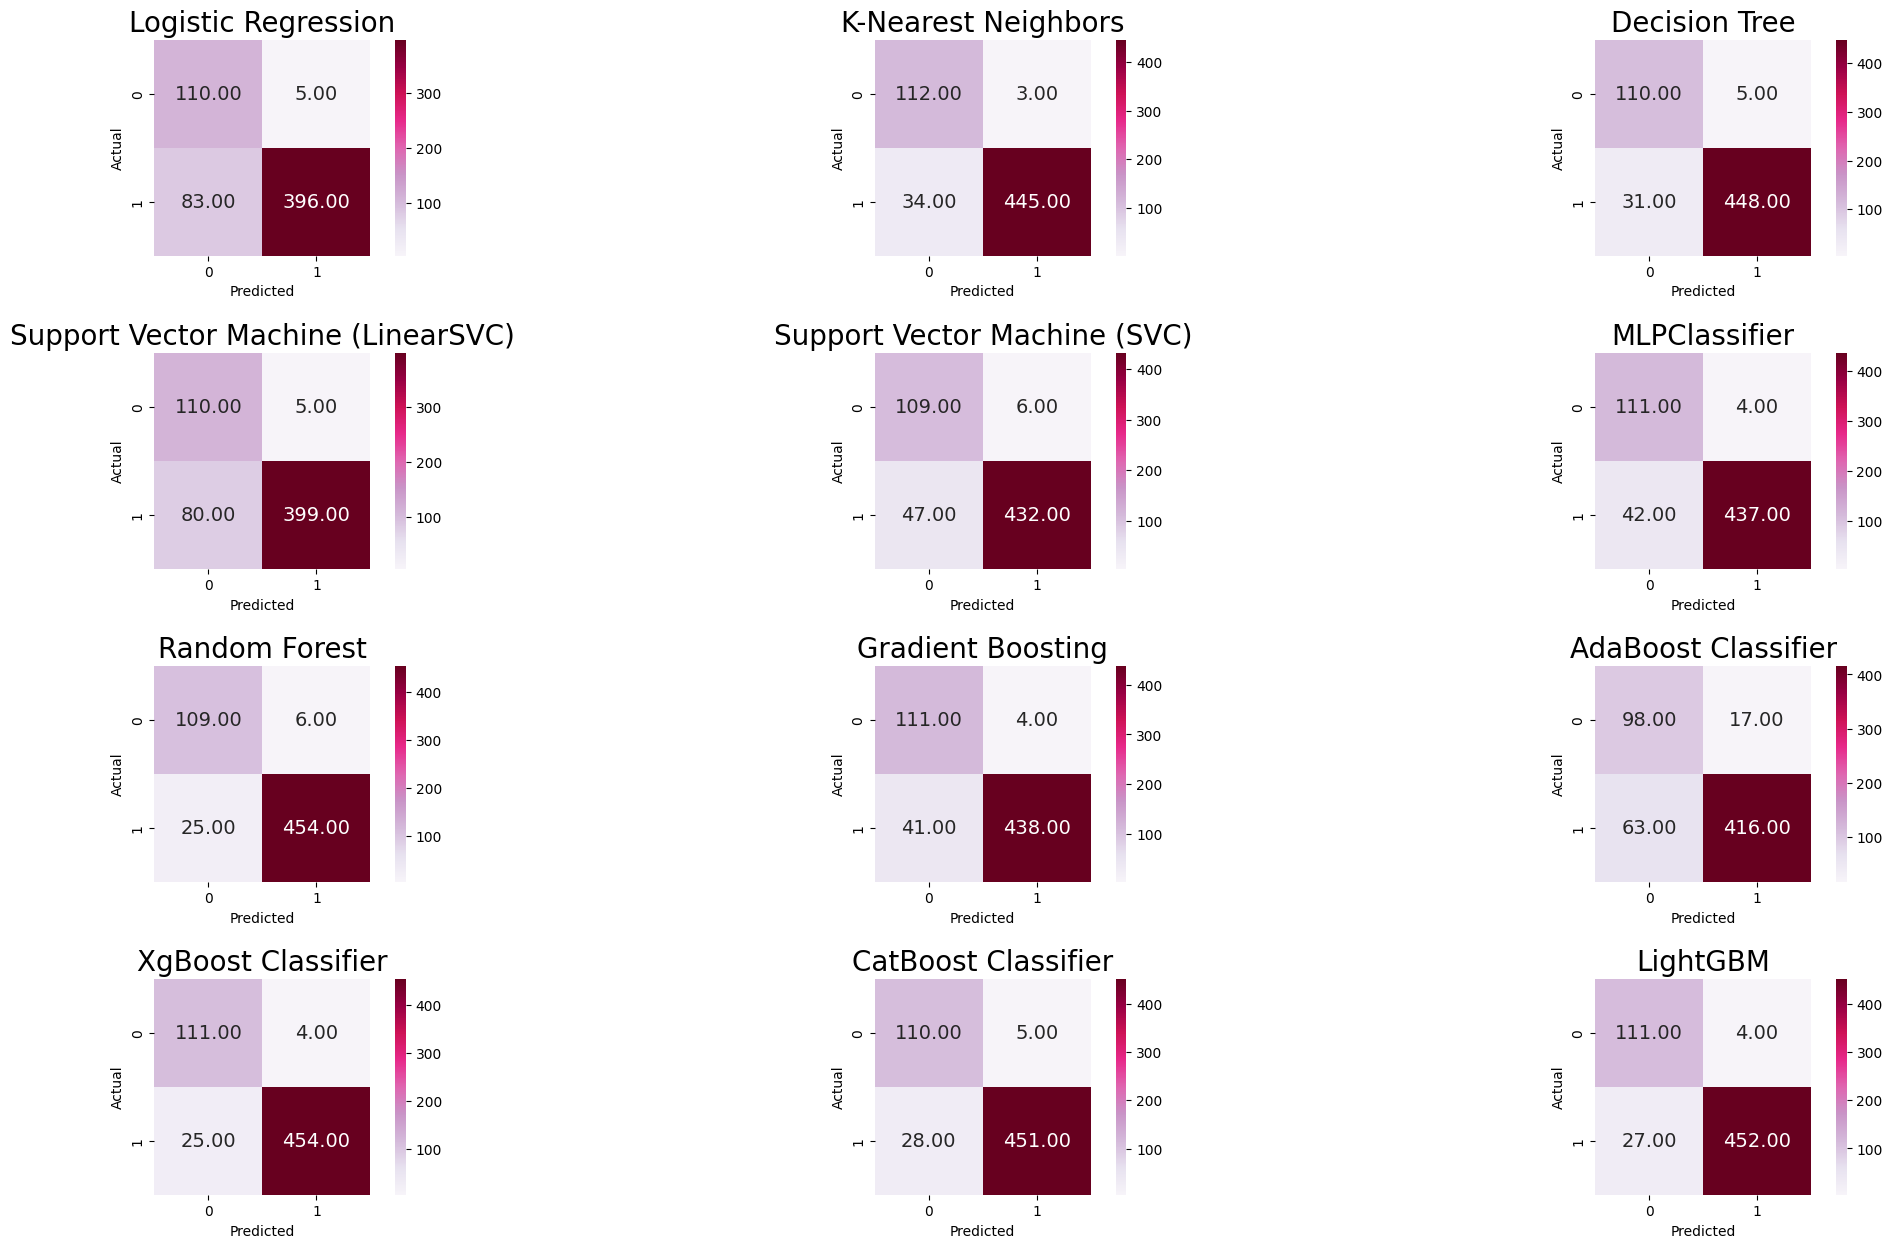

In [321]:
a = 1

fig = plt.figure(figsize=(25,15))

for name, model in var_models_adasyn.items():
    results = model.score(X_test, y_test)
    model = var_models_adasyn[name]
    y_test_pred = model.predict(X_test)
    arg_test = {'y_true':y_test, 'y_pred':y_test_pred}

    conf_mx = confusion_matrix(y_test, y_test_pred)

    heat_cm = pd.DataFrame(conf_mx, columns=np.unique(y_test), index = np.unique(y_test))
    heat_cm.index.name = 'Actual'
    heat_cm.columns.name = 'Predicted'

    plt.subplot(4, 3, a)
    fig.subplots_adjust(wspace=0.45, hspace= 0.45)
    sns.heatmap(heat_cm, annot=True, fmt='.2f', square=True, annot_kws={"size": 14}, cmap = 'PuRd').set_title(name, fontsize = 20)
    a = a + 1

plt.show()